In [1]:
from utils.hypothesis import *

from utils.data import *

In [9]:
def calculs_with_saf_per_year(annee, #int : année à calculer
                     incorpo,         # float : taux d'incorporation (hypothèse)
                     allowance_free_2023, # float : allowance d'émissions gratuites en 2023 (hypothèse)
                     price_saf,           # float : prix du SAF au litre (hypothèse)
                     price_kero,          # float : prix du kérosène au litre (hypothèse)
                     allowance_SAF        # float : allowance gratuite de réduction du surcoût lié au SAF (hypothèse)
                     ):
    # Recupère les données
    y = annee-2023
    carbonprice_one_year = carbonprice[y]
    quota_eu_one_year =  quota_eu[y]
    volume_carbu_an_one_year = volume_carbu_an[y]
    
    # Cas sans SAF : 
    prix_kero_an = volume_carbu_an_one_year * price_kero
    prix_carbone_kero_an = (CO2_em - allowance_free_2023*quota_eu_one_year) * carbonprice_one_year

    # Cas avec SAF :
    y = annee - 2023
    volume_saf_an = volume_carbu_an_one_year*incorpo
    volume_kero_saf_an = volume_carbu_an_one_year*(1-incorpo)

    # Calcul cout carbone kérosène
    CO2_em_kero = volume_kero_saf_an * nrj_volum_kero * core_lca_kero /1000000
    prix_carbone_kero_saf = ( CO2_em_kero - allowance_free_2023*quota_eu_one_year) * carbonprice_one_year

    # Calcul surcoût SAF
    prix_saf_an = volume_saf_an * price_saf
    prix_kero_saf_an = volume_kero_saf_an * price_kero

    prix_total_an = prix_saf_an + prix_kero_saf_an

    prix_extra_an =  prix_total_an - prix_kero_an

    allowances_extra_an = -prix_extra_an * allowance_SAF

    prix_ap_allowances_an = prix_total_an + allowances_extra_an
    
    tot = prix_carbone_kero_saf + prix_ap_allowances_an

    return tot


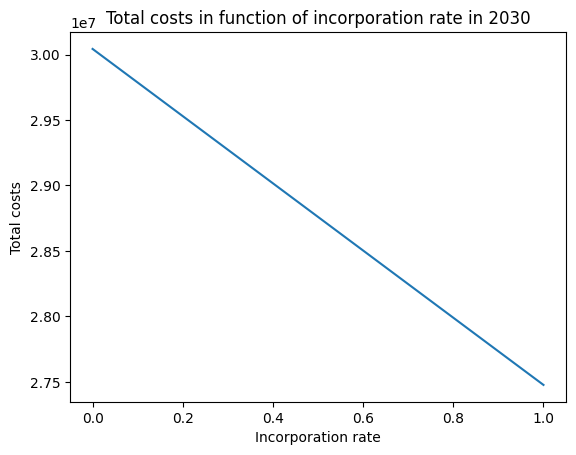

In [60]:
#Test fonction
incorpo_saf_for_test = np.linspace(0, 1, 50)

couts_tot = []
for incorp in incorpo_saf_for_test:
    couts_tot.append(calculs_with_saf_per_year(2030, incorp, allowance_free_2023, price_saf, price_kero, allowance_SAF))
couts_tot

# Trace un lineplot
plt.plot(incorpo_saf_for_test, couts_tot, label='Fonction xxx')
plt.xlabel('Incorporation rate')
plt.ylabel('Total costs')
plt.title('Total costs in function of incorporation rate in '+str(year))
plt.show()

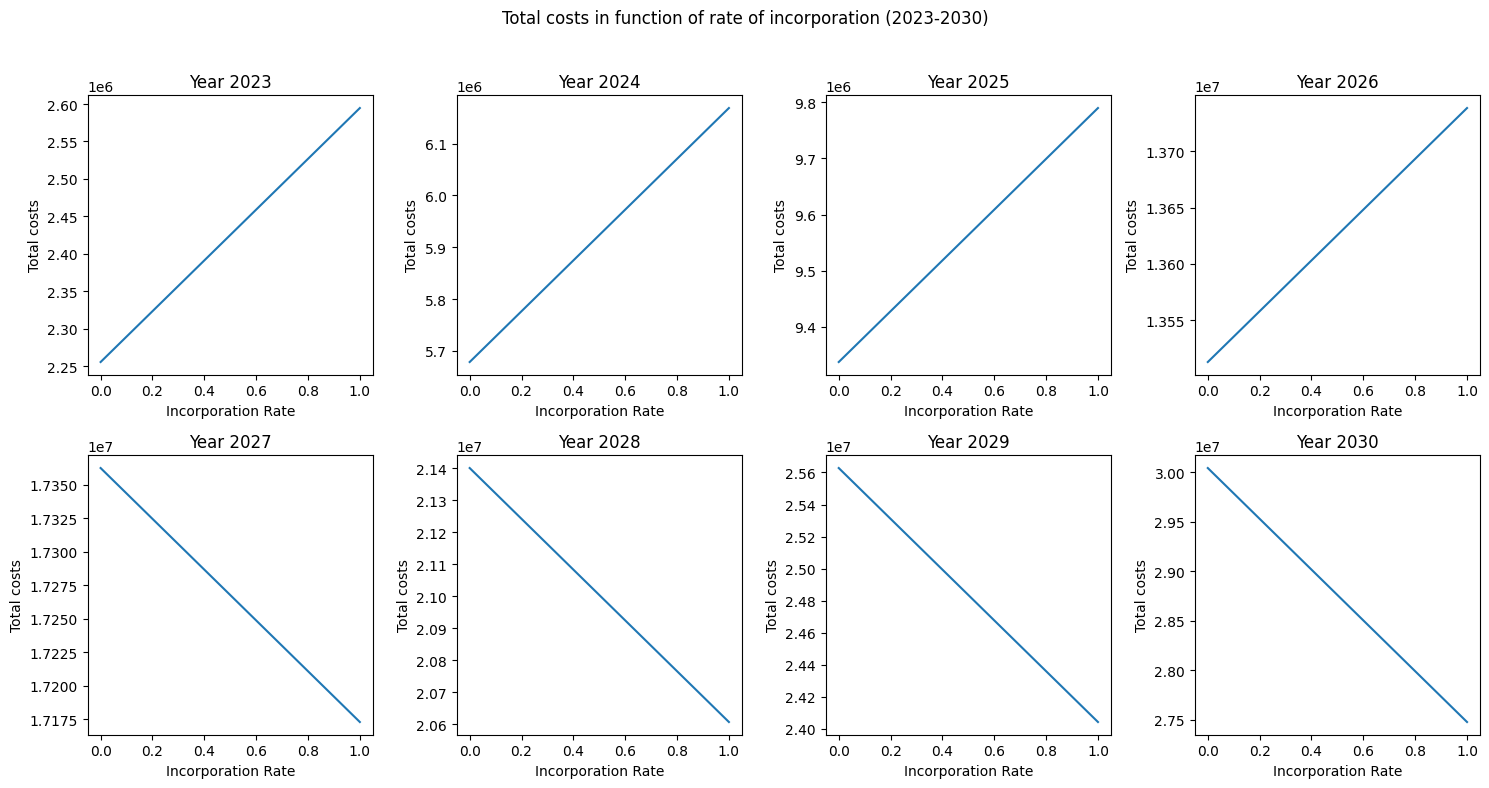

In [61]:


# Paramètres pour la disposition des sous-graphiques
num_rows = 2
num_cols = 4

# Créer une figure avec des sous-graphiques
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 8))
fig.suptitle('Total costs in function of rate of incorporation (2023-2030)')

incorpo_saf_for_test = np.linspace(0, 1, 50)
# Boucle sur les années de 2023 à 2030
for i, year in enumerate(range(2023, 2031)):
    # Sélectionner le sous-graphique approprié
    ax = axes[i // num_cols, i % num_cols]

    couts_tot = []
    for incorp in incorpo_saf_for_test:
        couts_tot.append(calculs_with_saf_per_year(year, incorp, allowance_free_2023, price_saf, price_kero, allowance_SAF))

    # Trace un lineplot pour chaque année dans un sous-graphique
    ax.plot(incorpo_saf_for_test, couts_tot, label=f'year {year}')
    ax.set_xlabel('Incorporation Rate')
    ax.set_ylabel('Total costs')
    ax.set_title(f'Year {year}')

# Ajuster la mise en page pour éviter les chevauchements
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Afficher le graphique
plt.show()


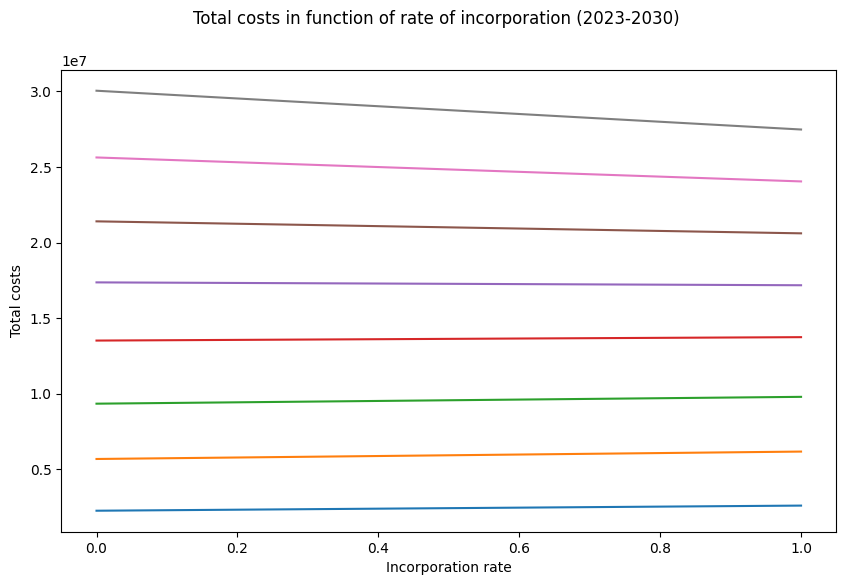

In [62]:
# On one graph only
fig, ax = plt.subplots(figsize=(10, 6))
fig.suptitle('Total costs in function of rate of incorporation (2023-2030)')

incorpo_saf_for_test = np.linspace(0, 1, 50)

for year in range(2023, 2031):
    couts_tot = []
    for incorp in incorpo_saf_for_test:
        couts_tot.append(calculs_with_saf_per_year(year, incorp, allowance_free_2023, price_saf, price_kero, allowance_SAF))

    ax.plot(incorpo_saf_for_test, couts_tot, label=f'Year {year}')

# Ajouter des étiquettes et une légende
ax.set_xlabel('Incorporation rate')
ax.set_ylabel('Total costs')
plt.show()


In [45]:
print((couts_tot[4]-couts_tot[3])/(incorpo_saf_for_test[4]-incorpo_saf_for_test[3]))
alpha = nrj_volum_kero*core_lca_kero/1000000
print(volume_carbu_an_one_year*((1-allowance_SAF)*(price_saf-price_kero)-carbonprice_one_year*alpha))

339240.26769140735
339240.2676914071
